CASE STUDY ON ENHANCING WEATHER PREDICTION MODELS WITH MACHINE LEARNING

BSS/2021/95727 : JEREMIAH MAINA

In [1]:
#CALLING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing data
X=pd.read_csv("C:/Users/PC/Downloads/archive (2) (1)/climate_change_data.csv")
X.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [3]:
X.tail()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255
9999,2022-12-31 00:00:00.000000000,West Anthonyburgh,Sao Tome and Principe,12.661928,381.172746,2.260788,78.339658,99.243923,41.856539


In [4]:
X.shape

(10000, 9)

In [5]:
X.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


In [7]:
#CHECKING FOR DUPLICATES
X.duplicated().sum()

0

In [8]:
#CHECKING FOR MISSING VALUES
X.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [9]:
#replacing space with underscore
X.columns=X.columns.str.replace(" ","_")
X.head()

,Date,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [10]:
#DELETING UN-NORMALIZABLE COLUMNS
del X["Country"]
del X["Location"]
del X["Date"]

In [11]:
print(X)

      Temperature  CO2_Emissions  Sea_Level_Rise  Precipitation   Humidity  \
0       10.688986     403.118903        0.717506      13.835237  23.631256   
1       13.814430     396.663499        1.205715      40.974084  43.982946   
2       27.323718     451.553155       -0.160783      42.697931  96.652600   
3       12.309581     422.404983       -0.475931       5.193341  47.467938   
4       13.210885     410.472999        1.135757      78.695280  61.789672   
...           ...            ...             ...            ...        ...   
9995    15.020523     391.379537       -1.452243      93.417109  25.293814   
9996    16.772451     346.921190        0.543616      49.882947  96.787402   
9997    22.370025     466.042136        1.026704      30.659841  15.211825   
9998    19.430853     337.899776       -0.895329      18.932275  82.774520   
9999    12.661928     381.172746        2.260788      78.339658  99.243923   

      Wind_Speed  
0      18.492026  
1      34.249300  
2     

In [12]:
#normalizing data using Z score
from sklearn.preprocessing import StandardScaler
#Create scaler
Scaler = StandardScaler()
#fitting and transforming data
Scaled_data=Scaler.fit_transform(X)
print(Scaled_data)

[[-0.84428235  0.0583251   0.72698312 -1.24895198 -0.90362832 -0.45555605]
 [-0.22296665 -0.0715768   1.21947681 -0.30862173 -0.20009616  0.63371229]
 [ 2.46258188  1.03296623 -0.15901486 -0.24889237  1.62062717  0.62506861]
 ...
 [ 1.47782355  1.32452758  1.03889517 -0.66599853 -1.19467741 -0.46926539]
 [ 0.89353758 -1.25407759 -0.90000798 -1.07234541  1.14087951  1.19883035]
 [-0.45207579 -0.38329679  2.28381093  0.98605302  1.71020593  1.15958528]]


In [13]:
X1=pd.DataFrame(Scaled_data)
X1

,0,1,2,3,4,5
0,-0.844282,0.058325,0.726983,-1.248952,-0.903628,-0.455556
1,-0.222967,-0.071577,1.219477,-0.308622,-0.200096,0.633712
2,2.462582,1.032966,-0.159015,-0.248892,1.620627,0.625069
3,-0.522120,0.446418,-0.476930,-1.548384,-0.079624,-1.142513
4,-0.342947,0.206311,1.148905,0.998375,0.415460,-1.180768
...,...,...,...,...,...,...
9995,0.016796,-0.177906,-1.461810,1.508470,-0.846156,-1.282338
9996,0.365066,-1.072540,0.551567,0.000060,1.625287,1.186716
9997,1.477824,1.324528,1.038895,-0.665999,-1.194677,-0.469265
9998,0.893538,-1.254078,-0.900008,-1.072345,1.140880,1.198830


DATA ANALYSIS

<Axes: >

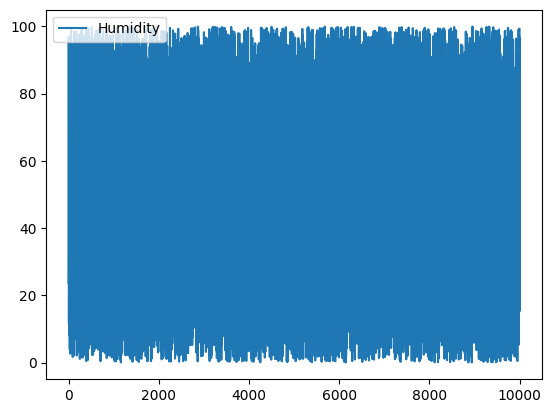

In [14]:
X[["Humidity"]].plot()

RIDGE MODEL

In [15]:
X['Target']=X.shift(-1)['Temperature']
X

,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Target
0,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,13.814430
1,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,27.323718
2,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,12.309581
3,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,13.210885
4,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,6.229326
...,...,...,...,...,...,...,...
9995,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866,16.772451
9996,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014,22.370025
9997,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708,19.430853
9998,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255,12.661928


In [16]:
X=X.iloc[:-1,:].copy()
X

,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Target
0,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,13.814430
1,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,27.323718
2,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,12.309581
3,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,13.210885
4,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,6.229326
...,...,...,...,...,...,...,...
9994,17.147936,414.475259,-0.046996,20.815504,39.215362,15.988626,15.020523
9995,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866,16.772451
9996,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014,22.370025
9997,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708,19.430853


In [19]:
from sklearn.linear_model import Ridge
reg=Ridge(alpha=.1)
predict=['Temperature','Wind_Speed']
train=X.loc[:9998]
test=X.loc[:9999]
reg.fit(train[predict],train['Target'])

Ridge(alpha=0.1)

In [23]:
Predictions=reg.predict(test[predict])
Predictions
pd.DataFrame(Predictions)

,0
0,14.942300
1,14.992665
2,14.868454
3,14.877680
4,14.866662
...,...
9994,14.870669
9995,14.842744
9996,15.005690
9997,14.834447


In [24]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test['Target'], Predictions)

4.011773189267081

In [27]:
Target_vs_Predictions=pd.concat([test['Target'],pd.Series(Predictions)],axis=1)
Target_vs_Predictions

,Target,0
0,13.814430,14.942300
1,27.323718,14.992665
2,12.309581,14.868454
3,13.210885,14.877680
4,6.229326,14.866662
...,...,...
9994,15.020523,14.870669
9995,16.772451,14.842744
9996,22.370025,15.005690
9997,19.430853,14.834447
